# Importaciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creación del dataframe

In [2]:
# Lectura de los datos históricos utilizando pandas
df = pd.read_excel('./datasets/viviendas_Madrid.xlsx', sheet_name='Datos_Históricos')

In [3]:
# Con el método .info() mostramos la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21742 non-null  int64  
 1   title                         21742 non-null  object 
 2   subtitle                      21742 non-null  object 
 3   sq_mt_built                   21616 non-null  float64
 4   sq_mt_useful                  8228 non-null   float64
 5   n_rooms                       21742 non-null  int64  
 6   n_bathrooms                   21726 non-null  float64
 7   n_floors                      1437 non-null   float64
 8   sq_mt_allotment               1432 non-null   float64
 9   latitude                      0 non-null      float64
 10  longitude                     0 non-null      float64
 11  raw_address                   16277 non-null  object 
 12  is_exact_address_hidden       21742 non-null  bool   
 13  s

In [4]:
# Con el método .head(n) mostramos los primeros n renglones del dataframe
df.head(5)

,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,...,en trÃ¡mite,False,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,...,en trÃ¡mite,True,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0


In [5]:
# Con los métodos .isnull().sum() verificamos cuantos valores nulos tenemos en cada columna
df.isnull().sum()

id                                  0
title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by_area                   0
is_buy_price

# Limpieza **inicial** del dataframe

In [6]:
"""
Si una columna tiene un alto porcentaje de valores nulos, no conviene utilizarla como variable
"""
# Eliminamos las variables con alto porcentaje de valores nulos

#   Creamos una serie de pandas con el número de valores nulos de cada variable
"""
    Una serie es un dataframe de una sola columna. En este caso creamos las cabeceras con su respectiva cantidad de valores nulos.
"""
df_var = df.isnull().sum()

#   Establecemos un porcentaje como límite para valores nulos (10%)
pcje_eliminacion = .1

#   Dejamos unicamente las variables que tienen un porcentaje de valores nulos menor al límite establecido
df_var = df_var[df_var<pcje_eliminacion*len(df)]

#   Creamos una lista con los nombres de las variables que nos interesan (los índices de de la serie)
lista_variables_OK = df_var.index

#   Filtramos el dataframe original y nos quedamos unicamente con las columnas que cumplen nuestros requisitos
df = df[lista_variables_OK]

# Vemos como va quedando el dataframe
df.head(5)

,id,title,subtitle,sq_mt_built,n_rooms,n_bathrooms,is_exact_address_hidden,is_floor_under,neighborhood_id,operation,rent_price,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,energy_certificate,has_parking
0,21742,"Piso en venta en calle de Godella, 64","San CristÃ³bal, Madrid",64.0,2,1.0,False,0.0,Neighborhood 135: San CristÃ³bal (1308.89 â‚¬/...,sale,471.0,False,85000,1328,True,HouseType 1: Pisos,False,0.0,D,False
1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ãngeles, Madrid",70.0,3,1.0,True,0.0,Neighborhood 132: Los Ãngeles (1796.68 â‚¬/m2...,sale,666.0,False,129900,1856,True,HouseType 1: Pisos,True,0.0,en trÃ¡mite,False
2,21740,"Piso en venta en calle del Talco, 68","San AndrÃ©s, Madrid",94.0,2,2.0,False,0.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,722.0,False,144247,1535,True,HouseType 1: Pisos,False,0.0,no indicado,False
3,21739,Piso en venta en calle Pedro JimÃ©nez,"San AndrÃ©s, Madrid",64.0,2,1.0,True,1.0,Neighborhood 134: San AndrÃ©s (1617.18 â‚¬/m2)...,sale,583.0,False,109900,1717,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,False
4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,2,2.0,True,0.0,Neighborhood 133: Los Rosales (1827.79 â‚¬/m2)...,sale,1094.0,False,260000,2407,True,HouseType 1: Pisos,False,0.0,en trÃ¡mite,True


In [7]:
# Si revisamos el dataframe sólo quedan las columnas con una cantidad inferior al 10% de valores nulos
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       21742 non-null  int64  
 1   title                    21742 non-null  object 
 2   subtitle                 21742 non-null  object 
 3   sq_mt_built              21616 non-null  float64
 4   n_rooms                  21742 non-null  int64  
 5   n_bathrooms              21726 non-null  float64
 6   is_exact_address_hidden  21742 non-null  bool   
 7   is_floor_under           20572 non-null  float64
 8   neighborhood_id          21742 non-null  object 
 9   operation                21742 non-null  object 
 10  rent_price               21742 non-null  float64
 11  is_rent_price_known      21742 non-null  bool   
 12  buy_price                21742 non-null  int64  
 13  buy_price_by_area        21742 non-null  int64  
 14  is_buy_price_known    

id                            0
title                         0
subtitle                      0
sq_mt_built                 126
n_rooms                       0
n_bathrooms                  16
is_exact_address_hidden       0
is_floor_under             1170
neighborhood_id               0
operation                     0
rent_price                    0
is_rent_price_known           0
buy_price                     0
buy_price_by_area             0
is_buy_price_known            0
house_type_id               391
is_renewal_needed             0
is_new_development          992
energy_certificate            0
has_parking                   0
dtype: int64

In [8]:
# Para lograr un dataframe limpio eliminamos todos los registros que tengan algún valor nulo (Método más sencillo, algo mas complejo sería interpolar)
df.dropna(inplace=True)

# Verificamos que no hayan quedado valores nulos en el dataframe
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19310 entries, 0 to 21740
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       19310 non-null  int64  
 1   title                    19310 non-null  object 
 2   subtitle                 19310 non-null  object 
 3   sq_mt_built              19310 non-null  float64
 4   n_rooms                  19310 non-null  int64  
 5   n_bathrooms              19310 non-null  float64
 6   is_exact_address_hidden  19310 non-null  bool   
 7   is_floor_under           19310 non-null  float64
 8   neighborhood_id          19310 non-null  object 
 9   operation                19310 non-null  object 
 10  rent_price               19310 non-null  float64
 11  is_rent_price_known      19310 non-null  bool   
 12  buy_price                19310 non-null  int64  
 13  buy_price_by_area        19310 non-null  int64  
 14  is_buy_price_known    

id                         0
title                      0
subtitle                   0
sq_mt_built                0
n_rooms                    0
n_bathrooms                0
is_exact_address_hidden    0
is_floor_under             0
neighborhood_id            0
operation                  0
rent_price                 0
is_rent_price_known        0
buy_price                  0
buy_price_by_area          0
is_buy_price_known         0
house_type_id              0
is_renewal_needed          0
is_new_development         0
energy_certificate         0
has_parking                0
dtype: int64

In [9]:
# Vemos los datos estadísticos principales del dataframe con los métodos .describe().transpose() (Buena práctica)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19310.0,10751.771621,6272.883675,2.0,5347.25,10575.5,16243.75,21742.0
sq_mt_built,19310.0,144.126359,125.418617,16.0,71.00,101.0,161.00,999.0
n_rooms,19310.0,3.013361,1.388427,0.0,2.00,3.0,4.00,24.0
n_bathrooms,19310.0,2.039617,1.271573,1.0,1.00,2.0,2.00,14.0
is_floor_under,19310.0,0.118747,0.323499,0.0,0.00,0.0,0.00,1.0
rent_price,19310.0,1573.749995,931.244378,18.0,913.00,1368.0,2073.50,12584.0
buy_price,19310.0,632592.345106,720196.584637,36000.0,200000.00,380000.0,750000.00,8800000.0
buy_price_by_area,19310.0,4061.935008,1917.230783,447.0,2586.00,3783.5,5047.00,18889.0
is_new_development,19310.0,0.060124,0.237723,0.0,0.00,0.0,0.00,1.0


# Visualización de estadísticas

Plots básicos

C:\Users\pety2\AppData\Local\Temp\ipykernel_2920\487558491.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['buy_price'])


<AxesSubplot: xlabel='buy_price', ylabel='Density'>

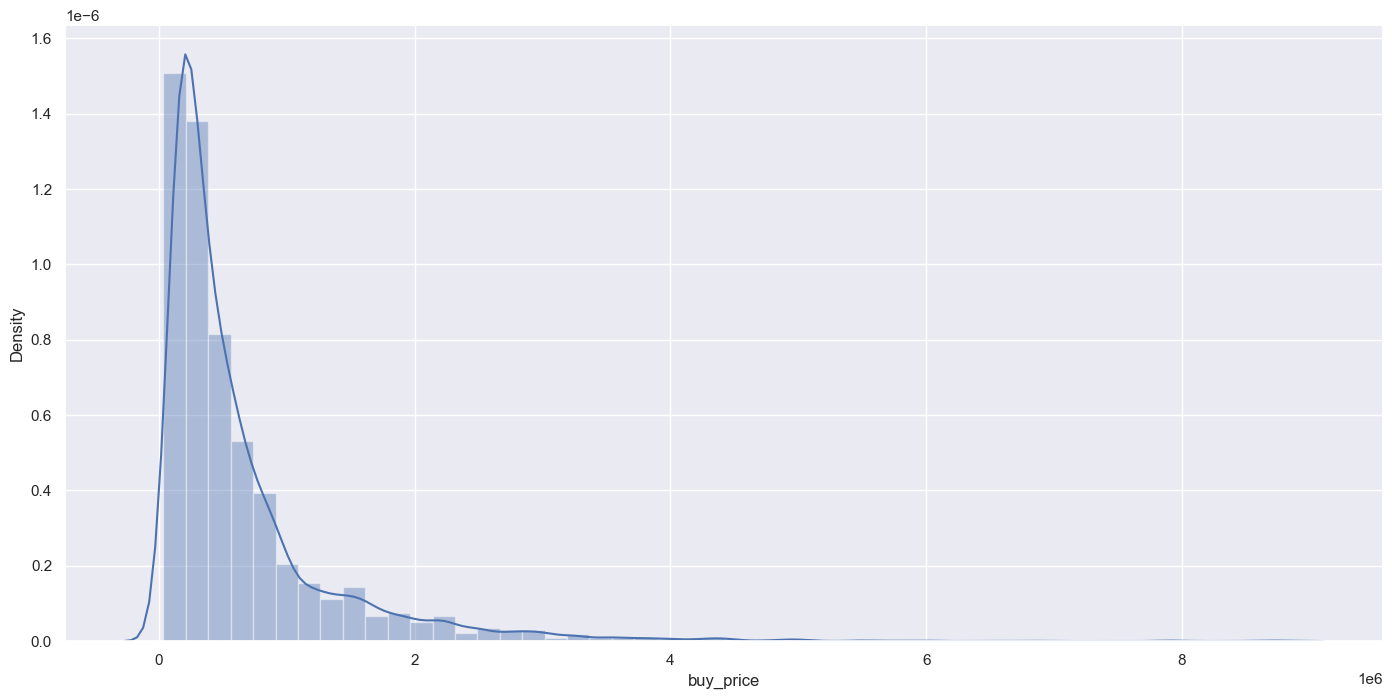

In [10]:
# Plot de distribución de la variable objetivo para ver los outliers y definir si es necesario descartarlos
#   Creamos una figura con matplotlib
plt.figure(figsize=(17,8))

#   Insertamos un distplot de seaborn de la variable objetivo en la figura creada
sns.set(style='darkgrid')
sns.distplot(df['buy_price'])

<AxesSubplot: ylabel='count'>

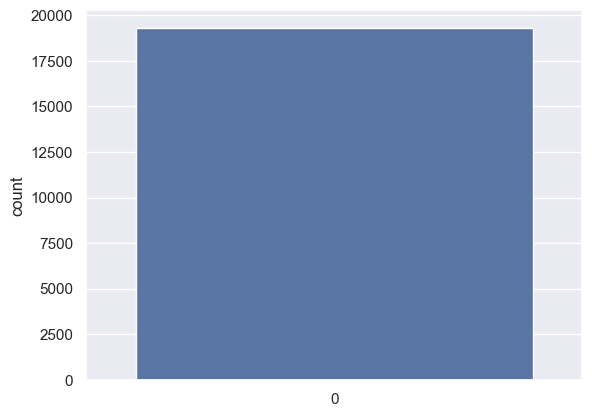

In [11]:
# Hacemos un countplot sobre la variable de cantidad de habitaciones
sns.countplot(df['n_rooms'])

In [12]:
# Usamos el método .corr() para verificar qué variables tienen correlación con la variable objetivo y la ordenamos de menor a mayor
#   Los datos negativos tienen una correlación inversamente proporcional
df.corr()['buy_price'].sort_values()

id                        -0.195828
is_floor_under            -0.149768
is_new_development        -0.013903
is_renewal_needed          0.052132
is_exact_address_hidden    0.167964
has_parking                0.315350
n_rooms                    0.578291
buy_price_by_area          0.581698
n_bathrooms                0.753692
sq_mt_built                0.831700
rent_price                 0.920350
buy_price                  1.000000
is_rent_price_known             NaN
is_buy_price_known              NaN
Name: buy_price, dtype: float64

<AxesSubplot: xlabel='buy_price', ylabel='sq_mt_built'>

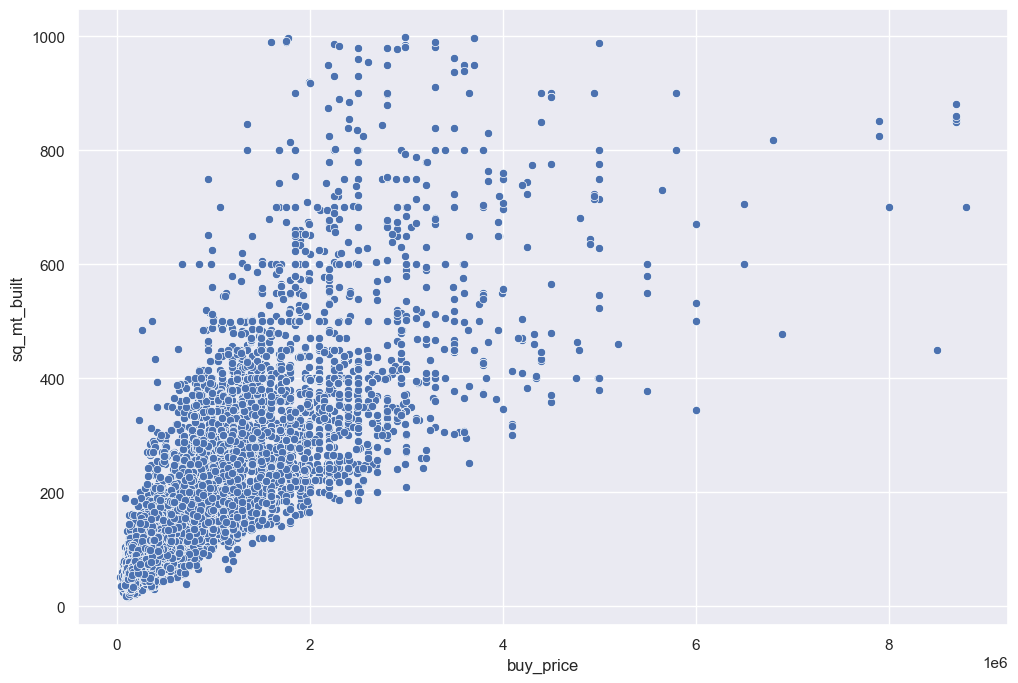

In [13]:
# Visualizamos las variables altamente correlacionadas con la variable objetivo

#   Relación precio de venta - metros cuadrados construidos
plt.figure(figsize=(12,8))
sns.scatterplot(x='buy_price', y='sq_mt_built', data=df)


<AxesSubplot: xlabel='n_bathrooms', ylabel='buy_price'>

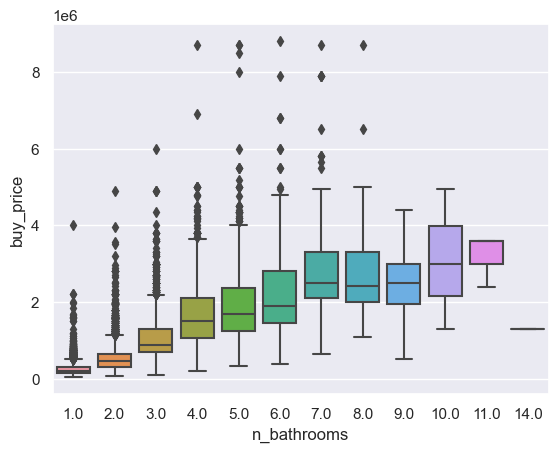

In [14]:
#   Relación precio de venta - cantidad de baños
sns.boxplot(x='n_bathrooms', y='buy_price', data=df)

In [15]:
"""
Si el dataframe tuviese buena información geográfica se podrían visualizar los plot geográficos
"""

'\nSi el dataframe tuviese buena información geográfica se podrían visualizar los plot geográficos\n'

# Limpieza **final** del dataframe

In [16]:
"""
Si una columna no tiene una correlación alta con la variable objetivo, no conviene utilizarla como variable.
"""

# Eliminamos las columnas de identificación y las columnas no correlacionadas con el método .drop()
df = df.drop(
    [
    'id',
    'title',
    'subtitle',
    'is_exact_address_hidden',
    'is_renewal_needed',
    'is_new_development',
    'neighborhood_id',
    'operation',
    'is_rent_price_known',
    'is_buy_price_known',
    'buy_price_by_area',
    'is_buy_price_known',
    'house_type_id',
    'energy_certificate',
],
axis=1
)

df.head()

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,has_parking
0,64.0,2,1.0,0.0,471.0,85000,False
1,70.0,3,1.0,0.0,666.0,129900,False
2,94.0,2,2.0,0.0,722.0,144247,False
3,64.0,2,1.0,1.0,583.0,109900,False
4,108.0,2,2.0,0.0,1094.0,260000,True


Limpieza temporal

In [17]:
"""
Si el dataset tuviese datos temporales es importante visualizar la evolución temporal y, si ha habido un importante cambio, quedarse sólo
con la porción de datos que corresponde a la situación actual para mejorar la futura predicción.
"""

'\nSi el dataset tuviese datos temporales es importante visualizar la evolución temporal y, si ha habido un importante cambio, quedarse sólo\ncon la porción de datos que corresponde a la situación actual para mejorar la futura predicción.\n'

Variables categóricas

In [18]:
"""
Si el dataset tuviese variables categóricas se debería utilizar OneHotEncoder para reemplazar cada categoría por un número
"""

'\nSi el dataset tuviese variables categóricas se debería utilizar OneHotEncoder para reemplazar cada categoría por un número\n'

# Train/Test split

In [19]:
"""
Debemos dividir todo el conjunto de datos en grupos de entrenamiento y prueba. Por lo general se dedica el 80% para entrenamiento
y el 20% restante para prueba.
"""

'\nDebemos dividir todo el conjunto de datos en grupos de entrenamiento y prueba. Por lo general se dedica el 80% para entrenamiento\ny el 20% restante para prueba.\n'

In [20]:
# Separamos el dataframe en X e y, donde X representa a todas las variables excepto la variable de salida, la cual es representada por y
X = df.drop('buy_price', axis=1)
y = df['buy_price']

In [21]:
# Importamos train_test_split desde sklearn.model_selection
from sklearn.model_selection import train_test_split

In [22]:
# Utilizamos el método train_test_split() para dividir el dataframe y generar las variables de entrada y salida de los conjuntos de train y test
#   train_test_split(variables de entrada, variables de salida, test_size=tamaño del conjunto de test (en porcentaje decimal), random_state=???)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=101)

In [23]:
# Vemos el tamaño de los conjuntos con .shape (retorna una tupla (celdas, columnas))
X_train.shape

(15448, 6)

In [24]:
X_test.shape

(3862, 6)

# Escalado

In [ ]:
"""
Para lograr un entrenamiento correcto, sin dar mayor importancia a variables sólo por su orden de magnitud (mayor importancia a una variable
que va de 1 a 100 sobre otra variable que va de 0 a 1) se debe realizar un escalado de todas las variables entre 0 y 1
"""

In [26]:
#  Importamos MinMaxScaler desde sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [27]:
# Creamos una instancia de MinMaxScaler
scaler = MinMaxScaler()

In [28]:
X_train

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,has_parking
2160,87.0,2,1.0,0.0,913.0,False
13201,150.0,2,2.0,1.0,1839.0,True
14224,682.0,24,4.0,0.0,6864.0,False
17339,154.0,5,5.0,0.0,2510.0,False
5298,70.0,3,1.0,0.0,621.0,False
...,...,...,...,...,...,...
6473,67.0,2,1.0,0.0,762.0,False
9240,146.0,3,2.0,0.0,2070.0,True
19993,104.0,2,1.0,0.0,1890.0,False
20197,85.0,2,2.0,0.0,1197.0,False


In [29]:
# Aplicamos el método .fit_transform() sobre X_train (ajusta los datos antes de escalarlos)
X_train = scaler.fit_transform(X_train)

In [30]:
X_train

array([[0.07230143, 0.08333333, 0.        , 0.        , 0.07122394,
        0.        ],
       [0.13645621, 0.08333333, 0.07692308, 1.        , 0.14491485,
        1.        ],
       [0.67820774, 1.        , 0.23076923, 0.        , 0.54480344,
        0.        ],
       ...,
       [0.08961303, 0.08333333, 0.        , 0.        , 0.14897342,
        0.        ],
       [0.07026477, 0.08333333, 0.07692308, 0.        , 0.09382461,
        0.        ],
       [0.10183299, 0.08333333, 0.07692308, 0.        , 0.18040745,
        0.        ]])

In [31]:
X_test

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,has_parking
15884,78.0,3,1.0,0.0,724.0,False
12837,149.0,4,2.0,0.0,1966.0,True
16432,60.0,2,1.0,0.0,625.0,False
18767,56.0,1,1.0,0.0,1197.0,False
20433,59.0,2,2.0,1.0,884.0,False
...,...,...,...,...,...,...
20290,82.0,3,2.0,0.0,1250.0,False
11924,150.0,2,2.0,0.0,2515.0,False
17715,60.0,1,1.0,0.0,1225.0,False
6430,130.0,4,2.0,0.0,1405.0,False


In [32]:
# Aplicamos el método .transform() sobre X_test (como los datos ya fueron ajustados, solo se necesita escalarlos)
X_test = scaler.transform(X_test)

In [33]:
X_test

array([[0.06313646, 0.125     , 0.        , 0.        , 0.05618335,
        0.        ],
       [0.13543788, 0.16666667, 0.07692308, 0.        , 0.15502149,
        1.        ],
       [0.04480652, 0.08333333, 0.        , 0.        , 0.04830495,
        0.        ],
       ...,
       [0.04480652, 0.04166667, 0.        , 0.        , 0.09605284,
        0.        ],
       [0.11608961, 0.16666667, 0.07692308, 0.        , 0.11037721,
        0.        ],
       [0.03665988, 0.04166667, 0.        , 1.        , 0.08141015,
        0.        ]])

# Creación del modelo

In [34]:
# Importamos las clases necesarias para la creación del modelo
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [35]:
# Creamos un modelo secuencial
model = Sequential()

# Indicamos un número de neuronas correspondiente al número de variables en X_train (recordar que .shape retorna una tupla (celdas, columnas))
num_neuronas = X_train.shape[1]

# Añadimos 4 capas de neuronas con función de activación relu
model.add(Dense(num_neuronas, activation='relu'))
model.add(Dense(num_neuronas, activation='relu'))
model.add(Dense(num_neuronas, activation='relu'))
model.add(Dense(num_neuronas, activation='relu'))

# Añadimos una capa de salida con una neurona por cada variable de salida
model.add(Dense(1))

# Compilamos el modelo indicando el optimizador a utilizar (optimizer) y el cálculo para valorar las pérdidas (loss)
model.compile(optimizer='adam', loss='mse')

# Entrenamiento del modelo

In [36]:
"""
Para realizar el entrenamiento del modelo utilizamos el método .fit(), donde indicamos los siguientes parámetros:

    > x= Conjunto X de entrenamiento

    > y= Valores del conjunto Y de entrenamiento

    > validation_data= Tupla con el conjunto X de prueba y los valores del conjunto Y de prueba. Si se indica, calcula sobre el conjunto de pruebas el resultado de 
                       pérdidas. Es recomendable realizarlo ya que, de esta forma, se puede realizar luego un gráfico para comparar las pérdidas durante el 
                       entrenamiento y durante la prueba

    > batch_size= Tamaño de datos que toma en cada cálculo (se recomienda indicar valores que sean potencia de 2). Mientras mas bajo, mayor velocidad de entrenamiento 
                  pero corre riesgo de no aprender las características y detalles que pueden ser significativos en la predicción. Mientras más alto, menor velocidad
                  entrenamiento pero mayor probabilidad de aprendizaje

    > epochs= Cantidad de iteraciones de datos que se harán durante el aprendizaje. Un número muy bajo puede resultar en Underfitting y un número muy alto puede 
              resultar en Overfitting.
"""
model.fit(
    x=X_train,
    y=y_train.values,
    validation_data=(X_test, y_test.values),
    batch_size=128,
    epochs=300
)

Epoch 1/300
121/121 [==============================] - 2s 7ms/step - loss: 935847657472.0000 - val_loss: 850748375040.0000
Epoch 2/300
121/121 [==============================] - 0s 3ms/step - loss: 935832846336.0000 - val_loss: 850714558464.0000
Epoch 3/300
121/121 [==============================] - 0s 3ms/step - loss: 935735132160.0000 - val_loss: 850523914240.0000
Epoch 4/300
121/121 [==============================] - 1s 5ms/step - loss: 935325663232.0000 - val_loss: 849850728448.0000
Epoch 5/300
121/121 [==============================] - 1s 6ms/step - loss: 934125961216.0000 - val_loss: 848086171648.0000
Epoch 6/300
121/121 [==============================] - 0s 4ms/step - loss: 931249324032.0000 - val_loss: 844098043904.0000
Epoch 7/300
121/121 [==============================] - 0s 3ms/step - loss: 925294460928.0000 - val_loss: 836428169216.0000
Epoch 8/300
121/121 [==============================] - 1s 5ms/step - loss: 914575327232.0000 - val_loss: 823365009408.0000
Epoch 9/300
121/

In [37]:
# Cargamos los datos de las perdidas en un dataframe a partir de método .history.history
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

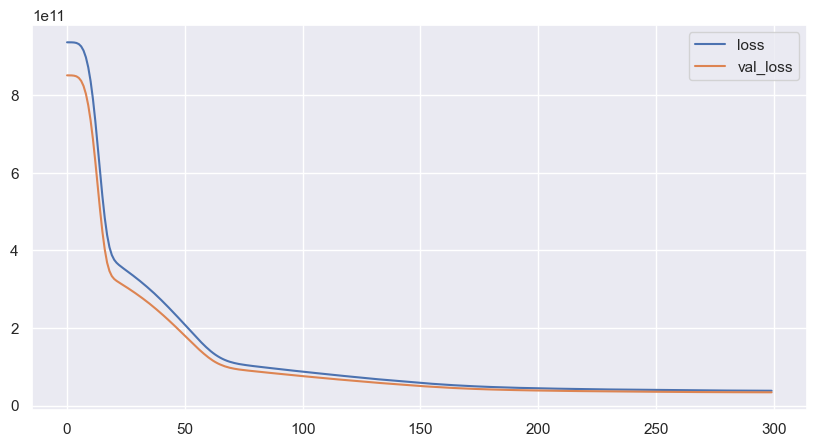

In [39]:
# Visualizamos un plot de este dataframe para comparar las pérdidas en el entrenamiento y la prueba
losses.plot(figsize=(10, 5))

# Evaluación del modelo

In [40]:
# Importamos los métodos necesarios desde la librería sklearn (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [41]:
# Realizamos la predicción de nuestro modelo con el conjunto de prueba (x) e instanciamos el resultado de cada entrada en una variable
predictions = model.predict(X_test)

121/121 [==============================] - 3s 5ms/step


In [42]:
# Comparamos los valores reales del conjunto de prueba (y) y los comparamos con las predicciones utilizando mean_absolute_error()
mean_absolute_error(y_test, predictions)

109868.39278142802

In [43]:
# Realizamos la raíz cuadrática (con el método sqrt() de Numpy) del error cuadrático medio (mean_squared_error() de sklearn)
np.sqrt(mean_squared_error(y_test, predictions))

185108.9987387719

In [44]:
# Calculamos la variancia (explained_variance_score) entre los valores reales del cojunto de prueba (y) y las predicciones, cuanto más cercano a 1 mejor ya que
# significa que conforme más aumenta o disminuye el valor real, más aumenta o disminuye el valor predecido
explained_variance_score(y_test, predictions)

0.9266042481106153

In [45]:
# Comparamos el valor absoluto (mean_absolute_error) con el promedio de la variable objetivo. Esto nos muestra en qué porcentaje nos estamos
# equivaocando respecto al promedio (más recomendable si hay valores outliers)
mean_absolute_error(y_test, predictions)/df['buy_price'].mean()

0.1736796115719512

In [46]:
# Comparamos el valor absoluto (mean_absolute_error) con la mediana de la variable objetivo. Esto nos muestra en qué porcentaje nos estamos
# equivocando respecto a la mediana
mean_absolute_error(y_test, predictions)/df['buy_price'].median()

0.28912734942481055

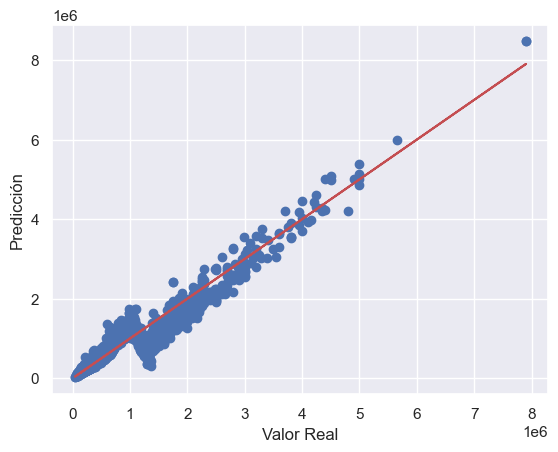

In [47]:
# Visualizamos un plot con la comparación entre la predicción realizada y los datos reales
# Nuestra predicción
plt.scatter(y_test, predictions)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

# Predición "perfecta"
plt.plot(y_test, y_test, 'r')

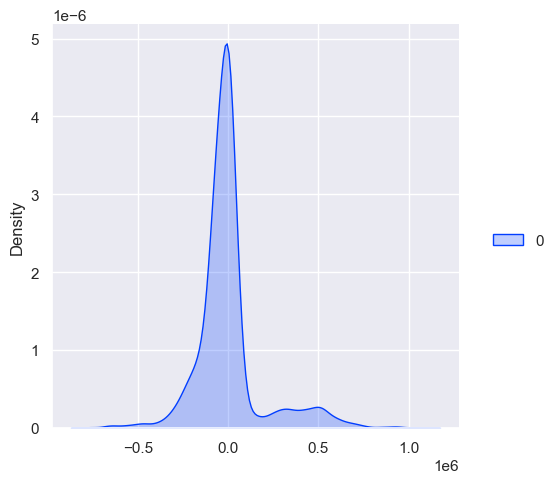

In [77]:
# Evaluamos los errores rotando los valores reales y restándoles las predicciones
errors = y_test.values.reshape(y_test.shape[0], 1) - predictions

# Visualizamos un displot de los errores. Lo ideal es que estos se encuentren centrados en el 0
sns.displot(errors, kind='kde', fill=True, palette=sns.color_palette('bright')[:1])


# Predicción con nuevos datos

In [81]:
# Insertamos los nuevos datos de entrada en un dataframe
df_pred = pd.read_excel('./datasets/viviendas_Madrid.xlsx', sheet_name='Datos_Predecir')

# Filtramos el nuevo dataframe para quedarnos con las mismas columnas de interés que en el dataframe de datos históricos
df_pred = df_pred[df.columns]

df_pred

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,has_parking
0,65,2,1.0,False,420,NaN,False
1,72,3,1.0,False,650,NaN,False
2,97,2,2.0,False,730,NaN,False
3,63,2,1.0,True,590,NaN,False
4,107,2,2.0,False,1000,NaN,True
5,125,4,2.0,False,890,NaN,True
6,130,5,2.0,False,885,NaN,True
7,135,3,2.0,False,912,NaN,False
8,76,3,2.0,False,970,NaN,True
9,87,2,1.0,False,701,NaN,False


In [82]:
# Eliminamos la columna de la variable objetivo
X_pred = df_pred.drop('buy_price', axis=1)

X_pred

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,has_parking
0,65,2,1.0,False,420,False
1,72,3,1.0,False,650,False
2,97,2,2.0,False,730,False
3,63,2,1.0,True,590,False
4,107,2,2.0,False,1000,True
5,125,4,2.0,False,890,True
6,130,5,2.0,False,885,True
7,135,3,2.0,False,912,False
8,76,3,2.0,False,970,True
9,87,2,1.0,False,701,False


In [83]:
# Escalamos las variables de entrada
X_pred  = scaler.transform(X_pred)

X_pred

array([[0.04989817, 0.08333333, 0.        , 0.        , 0.03199109,
        0.        ],
       [0.05702648, 0.125     , 0.        , 0.        , 0.05029445,
        0.        ],
       [0.08248473, 0.08333333, 0.07692308, 0.        , 0.05666083,
        0.        ],
       [0.04786151, 0.08333333, 0.        , 1.        , 0.04551966,
        0.        ],
       [0.09266802, 0.08333333, 0.07692308, 0.        , 0.07814738,
        1.        ],
       [0.11099796, 0.16666667, 0.07692308, 0.        , 0.0693936 ,
        1.        ],
       [0.11608961, 0.20833333, 0.07692308, 0.        , 0.0689957 ,
        1.        ],
       [0.12118126, 0.125     , 0.07692308, 0.        , 0.07114436,
        0.        ],
       [0.0610998 , 0.125     , 0.07692308, 0.        , 0.07575999,
        1.        ],
       [0.07230143, 0.08333333, 0.        , 0.        , 0.05435302,
        0.        ]])

In [84]:
# Realizamos la predicción
resultado = model.predict(X_pred)

resultado

1/1 [==============================] - 0s 337ms/step


array([[ 80540.46],
       [137216.75],
       [223319.77],
       [121027.35],
       [315907.53],
       [298760.38],
       [300748.25],
       [317857.1 ],
       [275794.5 ],
       [162815.89]], dtype=float32)

In [85]:
# Agregamos la columna con las predicciones al dataframe
df_pred['PREDICCIÓN'] = pd.DataFrame(resultado)

df_pred

,sq_mt_built,n_rooms,n_bathrooms,is_floor_under,rent_price,buy_price,has_parking,PREDICCIÓN
0,65,2,1.0,False,420,NaN,False,80540.460938
1,72,3,1.0,False,650,NaN,False,137216.750000
2,97,2,2.0,False,730,NaN,False,223319.765625
3,63,2,1.0,True,590,NaN,False,121027.351562
4,107,2,2.0,False,1000,NaN,True,315907.531250
5,125,4,2.0,False,890,NaN,True,298760.375000
6,130,5,2.0,False,885,NaN,True,300748.250000
7,135,3,2.0,False,912,NaN,False,317857.093750
8,76,3,2.0,False,970,NaN,True,275794.500000
9,87,2,1.0,False,701,NaN,False,162815.890625


# Guardar y cargar modelos para usos posteriores

Guardar modelo

In [87]:
# Guardamos el modelo, éste se guarda en la carpeta raíz
model.save('modelo_pred_vivienda.h5')

Cargar modelo

In [88]:
# Importamos el método load_model desde keras.models
from keras.models import load_model

# Cargamos el modelo desde el archivo guardado
modelo_viviendas = load_model('modelo_pred_vivienda.h5')